# L’analyse de données et le machine learning avec Python

Le package la plus adaptée pour faire du data mining et du machine learning est la package **scikit-learn**


Ce package propose des fonctions prédéfinies pour un grand nombre de méthodes

- La classification : SVM, plus proches voisins, random forest…
- Les régressions : linéaire, ridge, Lasso…
- Le clustering : k-means…
- L’analyse de données :  ACP, DA…

Dans le cadre de cette formation, l'objectf n'est pas de décrire la théorie des méthodes mais plutôt de comprendre l'utilisation de Python pour les appliquer.


# L’apprentissage supervisé avec Scikit-Learn
Les méthodes d’apprentissage supervisé sont les méthodes actuellement les plus
utilisées en data science. Il s’agit d’essayer de prédire une variable cible et d’utiliser
différentes méthodes pour arriver à cette fin.
Nous allons illustrer ces méthodes de traitement de données avec du code et des
cas pratiques.

### Les données et leur transformation
Pour rappel, il est composé de 3333 individus et de 18 variables. Il est stocké dans un fichier csv, nommé telecom.csv, accessible dans le répertoire Data. On le récupère en utilisant Pandas :

In [1]:
import pandas as pd
import numpy as np

In [5]:
%pwd

'C:\\Users\\s4d-asus-14\\Desktop\\Formation-IPSOS-j3'

In [42]:
churn=pd.read_csv("./data/telecom.csv")

In [8]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [10]:
churn["Area Code"].value_counts()

415    1655
510     840
408     838
Name: Area Code, dtype: int64

## Les données

Ce jeu de données n’a pas de données manquantes et nous allons devoir effectuer
quelques transformations pour l’adapter à nos traitements. Nous voyons par exemple qu’il est composé de trois colonnes object.

Nous pouvons afficher les statistiques descriptives pour les colonnes object :

In [7]:
churn.describe(include="object").transpose()

,count,unique,top,freq
State,3333,51,WV,106
Phone,3333,3333,406-2866,1
Int'l Plan,3333,2,no,3010
VMail Plan,3333,2,no,2411
Churn?,3333,2,False.,2850


## Transformation des données

On voit que les données sont toutes binaires. 

Pour les variables binaires, il nous suffit de les recoder avec Scikit-Learn pour obtenir des données exploitables. Par
ailleurs, il existe une autre variable qualitative dans notre jeu de données, Area Code,
qui est numérique mais avec trois modalités :

In [10]:
churn["Area Code"].value_counts()

415    1655
510     840
408     838
Name: Area Code, dtype: int64

## La préparation des données

Nous allons utiliser le processus de traitement classique pour transformer nos
données avec Scikit-Learn. Dans ce cas, nous n’avons pas de données manquantes,
nous travaillons donc sur la transformation des variables qualitatives.

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,Imputer
#from sklearn.impute import SimpleImputer

LabelEncoder va nous permettre de transformer les valeurs textuelles en entiers.
Nous pouvons utiliser pour chaque variable qualitative :

In [43]:
# création d'un objet
encoder=LabelEncoder()

In [44]:
# on applique les données à l'objet
churn["Churn?"]=encoder.fit_transform(churn["Churn?"])

In [17]:
encoder.inverse_transform(churn["Churn?"])

array(['False.', 'False.', 'False.', ..., 'False.', 'False.', 'False.'],
      dtype=object)

In [11]:
churn["Churn?"].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

In [21]:
encoder.inverse_transform(churn["Churn!"])

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['False.', 'False.', 'False.', ..., 'False.', 'False.', 'False.'],
      dtype=object)

In [24]:
onehot_state=OneHotEncoder(sparse=False)

In [26]:
state_trans = onehot_state.fit_transform(np.array(churn["Area Code"]).reshape((-1,1)))

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
state_trans.shape

(3333, 3)

In [30]:
onehot_state.inverse_transform(state_trans)

array([[415.],
       [415.],
       [415.],
       ...,
       [510.],
       [510.],
       [415.]])

In [33]:
onehot_state.transform(np.array([415]).reshape(-1, 1))

array([[0., 1., 0.]])

In [31]:
pd.get_dummies(churn["Area Code"])

,408,415,510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,1,0
8,1,0,0
9,0,1,0


In [45]:
def fonc_transfo(frame):
    """ Fonction permettant de transformer toutes les colonnes qualitatives en quanti
    et de stocker les objets dans un dictionnaie
    """
    dict_label_encode={}
    for col in frame.columns:
        if frame[col].dtype == object:
            dict_label_encode[col]=LabelEncoder()
            frame[col]=dict_label_encode[col].fit_transform(frame[col])
    
    return frame, dict_label_encode

In [46]:
churn, dico_label = fonc_transfo(churn)

In [47]:
dico_label

{'State': LabelEncoder(),
 'Phone': LabelEncoder(),
 "Int'l Plan": LabelEncoder(),
 'VMail Plan': LabelEncoder()}

In [48]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Prédire l’attrition des clients
Lorsqu’on veut prédire une variable binaire, on devra avoir une colonne du type
binaire. On préfère généralement un codage 0/1 afin de garder un type entier simple à gérer. 

Les variables explicatives x auront été préparées de manière intelligente afin de bien appliquer nos modèles.

On crée donc x et y :

In [56]:
from statsmodels.formula.api import logit

In [53]:
churn['churn']=churn['Churn?']

In [61]:
modele_logit_stat = logit("churn ~ Phone", data=churn).fit()

Optimization terminated successfully.
         Current function value: 0.413770
         Iterations 6


In [62]:
modele_logit_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:               3.825e-05
Time:                        12:10:52   Log-Likelihood:                -1379.1
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                    0.7453
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8028      0.099    -18.232      0.000      -1.997      -1.609
Phone       1.661e-05   5.11e-05      0.325      0.745   -8.36e-05       0.000
==============================================================================
"""

In [80]:
x=churn.drop(['State', 'Account Length', 'Area Code', 'Phone',"Churn?","churn"], axis=1)
y=churn["Churn?"]

## Séparation des données

Pour la séparation, on utilise la fonction train_test_split() de Scikit-Learn.

Cette fonction permet de créer automatiquement autant de structures que nécessaire
à partir de nos données. 

Elle utilise une randomisation des individus et ensuite une séparation en fonction d’un paramètre du type test_size :

In [82]:
# on importe la fonction
from sklearn.model_selection import train_test_split
# dans ce cas on a :
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0,)

In [30]:
print(x_train.shape,x_test.shape)

(2666, 16) (667, 16)


Dans certains cas, il peut arriver qu’il y ait une forte disparité de distribution des
modalités entre les proportions d’acceptation et de refus. On peut vouloir faire en
sorte que les répartitions des modalités de y soient égales dans les différents échantillons,
on pourra alors utiliser une stratification. On va utiliser une stratification en
prenant y comme base pour effectuer la stratification :

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify = y)
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn?, dtype: float64

Ainsi les deux échantillons _train et _test ont la même distribution

In [68]:
y_test.value_counts(normalize=True)

0    0.855
1    0.145
Name: Churn?, dtype: float64

In [69]:
y_train.value_counts(normalize=True)

0    0.855122
1    0.144878
Name: Churn?, dtype: float64

## Le choix et l’ajustement de l’algorithme

Tout au long de ce Notebook, nous allons essayer d'ajouter un nouveau modèle, il s'agit du modèle GBM
```python
from sklearn.ensemble import GradientBoostingClassifier
```

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# ajouter le 3ème modèle

Ensuite, on crée un objet à partir de la classe du modèle en lui fournissant les
hyperparamètres dont il a besoin :

In [84]:
modele_rf=RandomForestClassifier(n_estimators=100)
modele_knn=KNeighborsClassifier(n_neighbors=10)
modele_nb=GaussianNB()
modele_gbm=GradientBoostingClassifier()
modele_svm=SVC()
modele_nn=MLPClassifier()
# ajouter le 3ème modèle

In [ ]:
modele_nn.

Dans ce cas, on prend les hyperparamètres par défaut.

On peut ensuite ajuster notre modèle en utilisant les données :

In [85]:
%time modele_rf.fit(x_train,y_train)
%time modele_knn.fit(x_train,y_train)
%time modele_nb.fit(x_train,y_train)
%time modele_gbm.fit(x_train,y_train)
%time modele_svm.fit(x_train,y_train)
%time modele_nn.fit(x_train,y_train)

Wall time: 388 ms
Wall time: 3 ms
Wall time: 2 ms
Wall time: 186 ms


C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 469 ms
Wall time: 747 ms


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [88]:
pd.DataFrame(modele_rf.feature_importances_, index=x.columns).sort_values([0],ascending=False)

,0
Day Mins,0.146246
Day Charge,0.137669
CustServ Calls,0.123952
Int'l Plan,0.078594
Eve Charge,0.074682
Eve Mins,0.064960
Intl Calls,0.053851
Night Mins,0.045343
Intl Mins,0.043422
Night Charge,0.041566


Une fois qu’on a estimé les paramètres du modèle, on va pouvoir extraire des
informations. De nouveaux attributs de chaque classe apparaissent, ils se terminent par le symbole underscore _ :

In [79]:
pd.DataFrame(modele_gbm.feature_importances_,
             index=x.columns,
             columns=["Feature importance"]).sort_values("Feature importance",
                                                         ascending=False)

,Feature importance
churn,1.0
Night Mins,0.0
CustServ Calls,0.0
Intl Charge,0.0
Intl Calls,0.0
Intl Mins,0.0
Night Charge,0.0
Night Calls,0.0
Int'l Plan,0.0
VMail Plan,0.0


In [52]:
pd.DataFrame(modele_rf.feature_importances_,index=x.columns,columns=["Feature importance"]).sort_values("Feature importance",
                                                                                                        ascending=False)

,Feature importance
Day Charge,0.150926
Day Mins,0.139922
CustServ Calls,0.123719
Int'l Plan,0.079338
Eve Mins,0.072515
Eve Charge,0.066576
Intl Calls,0.052514
Intl Charge,0.046362
Intl Mins,0.040294
Night Mins,0.037464


In [95]:
modele_nn.loss_

0.3032481490575631

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

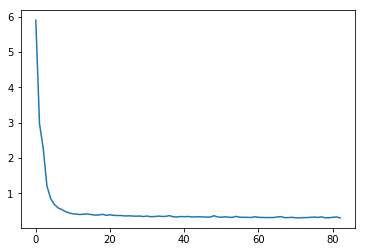

In [97]:
plt.plot(modele_nn.loss_curve_)

In [ ]:
modele_nn.

Ce qui va nous intéresse avant tout, c’est de prédire avec notre modèle. Pour cela nous allons utiliser la méthode .predict() :

In [104]:
%time y_predict_rf = modele_rf.predict(x_test)
%time y_predict_knn = modele_knn.predict(x_test)
%time y_predict_nb = modele_nb.predict(x_test)
%time y_predict_gbm = modele_gbm.predict(x_test)
%time y_predict_svm = modele_svm.predict(x_test)
%time y_predict_nn = modele_nn.predict(x_test)

Wall time: 13 ms
Wall time: 18 ms
Wall time: 997 µs
Wall time: 1.01 ms
Wall time: 94.6 ms
Wall time: 0 ns


In [102]:
y_predict_rf.shape

(667, 2)

In [62]:
print(y_predict_gbm.shape,y_test.shape)

(1000,) (1000,)


On obtient ainsi une valeur prédite pour les éléments de notre échantillon de
validation.

## Les indicateurs pour valider un modèle
La partie validation d’un modèle d’apprentissage supervisé est extrêmement
importante. L’objectif d’un modèle d’apprentissage supervisé est de prédire une
valeur la plus proche possible de la réalité. Nous différencions trois types d’indices
en fonction du type de variable cible. Tous les indicateurs de qualité du modèle sont
stockés dans le module *metrics* de Scikit-Learn.

## Le pourcentage de bien classés
Il s’agit de l’indicateur le plus connu. On le nomme accuracy. Il est calculé à partir du rapport entre le nombre d’individus bien classés et le nombre total d’individus dans l’échantillon.

In [106]:
from sklearn.metrics import accuracy_score, recall_score,r2_score

accuracy_modele_rf = accuracy_score(y_test,y_predict_rf)
accuracy_modele_knn = accuracy_score(y_test,y_predict_knn)
accuracy_modele_nb = accuracy_score(y_test,y_predict_nb)
accuracy_modele_gbm = accuracy_score(y_test,y_predict_gbm)
accuracy_modele_svm = accuracy_score(y_test,y_predict_svm)
accuracy_modele_nn = accuracy_score(y_test,y_predict_nn)

print("Pourcentage de bien classés pour le modèle RF : %.3f" %(accuracy_modele_rf))
print("Pourcentage de bien classés pour le modèle kNN :%.3f" %(accuracy_modele_knn))
print("Pourcentage de bien classés pour le modèle naiveB :%.3f" %(accuracy_modele_nb))
print("Pourcentage de bien classés pour le modèle GBM :%.3f" %(accuracy_modele_gbm))
print("Pourcentage de bien classés pour le modèle SVM :%.3f" %(accuracy_modele_svm))
print("Pourcentage de bien classés pour le modèle NN :%.3f" %(accuracy_modele_nn))
# ajouter le 3ème modèle

Pourcentage de bien classés pour le modèle RF : 0.958
Pourcentage de bien classés pour le modèle kNN :0.879
Pourcentage de bien classés pour le modèle naiveB :0.855
Pourcentage de bien classés pour le modèle GBM :0.958
Pourcentage de bien classés pour le modèle SVM :0.868
Pourcentage de bien classés pour le modèle NN :0.724


In [65]:
recall_modele_rf=recall_score(y_test,y_predict_rf)
recall_modele_knn=recall_score(y_test,y_predict_knn)
print("Rappel pour le modèle RF : %.3f" %(recall_modele_rf))
print("Rappel pour le modèle kNN :%.3f" %(recall_modele_knn))

Rappel pour le modèle RF : 0.738
Rappel pour le modèle kNN :0.386


## La matrice de confusion
Il s’agit d’un autre indicateur important pour juger de la qualité d’un modèle, il n’est pas défini par une seule valeur mais par une matrice dans laquelle on peut lire le croisement entre les valeurs observées et les valeurs prédites à partir du modèle. 

Pour calculer cette matrice, on pourra utiliser :

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rf=confusion_matrix(y_test,y_predict_rf)
confusion_matrix_knn=confusion_matrix(y_test,y_predict_knn)
confusion_matrix_nb=confusion_matrix(y_test,y_predict_nb)
confusion_matrix_gbm=confusion_matrix(y_test,y_predict_gbm)
confusion_matrix_svm=confusion_matrix(y_test,y_predict_svm)
confusion_matrix_nn=confusion_matrix(y_test,y_predict_nn)
print("Matrice de confusion pour le modèle RF :",
confusion_matrix_rf, sep="\n")
print("Matrice de confusion pour le modèle kNN :",
confusion_matrix_knn, sep="\n")
print("Matrice de confusion pour le modèle NB :",
confusion_matrix_nb, sep="\n")
print("Matrice de confusion pour le modèle GBM :",
confusion_matrix_gbm, sep="\n")
print("Matrice de confusion pour le modèle SVM :",
confusion_matrix_svm, sep="\n")
print("Matrice de confusion pour le modèle NN :",
confusion_matrix_nn, sep="\n")

Matrice de confusion pour le modèle RF :
[[569  10]
 [ 18  70]]
Matrice de confusion pour le modèle kNN :
[[566  13]
 [ 68  20]]
Matrice de confusion pour le modèle NB :
[[520  59]
 [ 38  50]]
Matrice de confusion pour le modèle GBM :
[[570   9]
 [ 19  69]]
Matrice de confusion pour le modèle SVM :
[[579   0]
 [ 88   0]]
Matrice de confusion pour le modèle NN :
[[423 156]
 [ 28  60]]


## Le rappel (recall), la précision et le f1-score

Scikit-Learn possède des fonctions pour chacun de ces indicateurs, mais il peut
être intéressant d’utiliser une autre fonction qui les affiche pour chaque classe :

tp / (tp + fn)

In [68]:
from sklearn.metrics import classification_report
print("Rapport pour le modèle RF :",
      classification_report(y_test,y_predict_rf) ,sep="\n")

Rapport pour le modèle RF :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       855
           1       0.88      0.74      0.80       145

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.92      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000



In [69]:
print("Rapport pour le modèle kNN :",
      classification_report(y_test,y_predict_knn) ,sep="\n")

Rapport pour le modèle kNN :
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       855
           1       0.72      0.39      0.50       145

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.81      0.68      0.72      1000
weighted avg       0.88      0.89      0.87      1000



In [ ]:
# ajouter le 3ème modèle

## L’aire sous la courbe ROC
La courbe ROC est un indicateur important mais on préfère souvent une valeur plutôt
qu’une courbe afin de comparer nos modèles. Pour cela, on utilise l’aire sous la courbe
ROC (AUC). Cette aire est calculée directement à partir de la courbe ROC. Ainsi, un
modèle aléatoire aura une AUC de 0.5 et un modèle parfait aura une AUC de 1.

In [72]:
from sklearn.metrics import roc_auc_score
auc_modele_rf=roc_auc_score(y_test, modele_rf.predict_proba(x_test)[:,1])
auc_modele_knn=roc_auc_score(y_test,modele_knn.predict_proba(x_test)[:,1])
auc_modele_nb=roc_auc_score(y_test,modele_nb.predict_proba(x_test)[:,1])
auc_modele_gbm=roc_auc_score(y_test,modele_gbm.predict_proba(x_test)[:,1])

print("Aire sous la courbe ROC pour le modèle RF :" ,auc_modele_rf)
print("Aire sous la courbe ROC pour le modèle kNN :" ,auc_modele_knn)
print("Aire sous la courbe ROC pour le modèle NB :" ,auc_modele_nb)
print("Aire sous la courbe ROC pour le modèle GBM :" ,auc_modele_gbm)

Aire sous la courbe ROC pour le modèle RF : 0.9009074410163338
Aire sous la courbe ROC pour le modèle kNN : 0.700508166969147
Aire sous la courbe ROC pour le modèle NB : 0.839919338576326
Aire sous la courbe ROC pour le modèle GBM : 0.9006775559588627


## La validation croisée
Jusqu’ici nous avons utilisé des indicateurs basés sur une seule occurrence de test. Ceci veut dire qu’on ne teste notre modèle que sur un seul échantillon.

Une approche alternative souvent utilisée est la validation croisée. Celle-ci est en fait basée sur la répétition de l’estimation et de la validation sur des données différentes.

Pour obtenir ce cv-score, on utilise :

In [39]:
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(modele_rf, x_train, y_train, cv=5, scoring='roc_auc')
scores_knn = cross_val_score(modele_knn, x_train, y_train, cv=5, scoring='roc_auc')

print("AUC pour RF : %.3f (+/- %.3f)"% (scores_rf.mean(), scores_rf.std() * 2))
print("AUC pour kNN : %.3f (+/- %.3f)"% (scores_knn.mean(),scores_knn.std() * 2))
# ajouter le 3ème modèle

AUC pour RF : 0.916 (+/- 0.062)
AUC pour kNN : 0.681 (+/- 0.096)


# Modèle de régression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [76]:
y_quanti=churn["Day Charge"]

In [75]:
x_quanti=x.drop("Day Charge",axis=1)

In [78]:
modele_reg=LinearRegression()

In [80]:
x_train_q, x_test_q, y_train_q, y_test_q = train_test_split(x_quanti,y_quanti,test_size=0.2,random_state=0)

In [81]:
modele_reg.fit(x_train_q,y_train_q)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test_q, modele_reg.predict(x_test_q)))

0.0028394050724455874

## L’ajustement des hyperparamètres d’un modèle

L’une des tâches du data scientist est de trouver le meilleur modèle possible. La
plupart des modèles de machine learning ont des hyperparamètres. Il s’agit de paramètres
du modèle qui sont définis en amont de l’ajustement.

Scikit-Learn propose une classe GridSearchCV permettant d’implémenter cette
recherche d’hyperparamètres :

In [109]:
from sklearn.model_selection import GridSearchCV

On va donc devoir définir les hyperparamètres que l’on souhaite tester. Pour cela,
on utilisera un dictionnaire d’hyperparamètres, par exemple :

In [110]:
dico_param= {"max_depth":[3,5,7,10], "n_estimators":[10,20,50,100]}

On va encore utiliser l’accuracy pour valider notre modèle. Finalement, nous allons
utiliser une validation croisée à cinq groupes pour valider les résultats.
Le nouvel objet est le suivant :

In [112]:
recherche_hyper = GridSearchCV(RandomForestClassifier(), 
                               dico_param, 
                               scoring="accuracy",cv=5)
# plusieurs indicateurs de qualité
recherche_hyper_plusieurs = GridSearchCV(RandomForestClassifier(), 
                               dico_param, 
                               scoring={'AUC': 'roc_auc', 'Recal':"recall"},refit=False,cv=5)

Une fois qu’on a créé cet objet, on peut lui joindre les données afin d’estimer les
meilleurs paramètres du modèle.

Cette étape peut être très longue.

In [113]:
recherche_hyper.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 10], 'n_estimators': [10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [117]:
recherche_hyper_plusieurs.fit(x_train, y_train)
pass

In [114]:
print(recherche_hyper.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [115]:
print(recherche_hyper.best_score_)

0.9516129032258065


In [119]:
pd.DataFrame(recherche_hyper.cv_results_).to_excel("res.xlsx")

**Exercice :**

Effectuez le même travail avec GBM

## La construction d’un pipeline de traitement

Bien souvent vous allez être amené à enchaîner des traitements sur des données.
On peut bien sûr développer son code de manière à suivre les étapes une à une mais il est souvent plus intéressant de créer des suites de traitements automatisées avec Scikit-Learn. 

Ces suites de traitements sont appelées pipeline. Ils simplifieront votre code et permettront de passer en production simplement.

Ainsi, on va pouvoir faire une analyse en composantes principales suivies d’un
algorithme de plus proches voisins directement dans un pipeline :

In [122]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

In [123]:
acp=PCA(n_components=8)
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
pipe=Pipeline(steps=[("acp",RandomForestClassifier()),("knn",KNeighborsClassifier())])
pipe2=Pipeline(steps=[("acp",acp),("rf",rf)])

pipe=Pipeline(steps=[("acp",acp),("knn",knn)])
pipe.fit(x_train, y_train)
pipe2.fit(x_train, y_train)
pass

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


On a ainsi enchaîné deux traitements. Si on cherche des sorties liées à chacune
des étapes, on pourra le faire simplement. Par exemple, si l’objectif est d’extraire la part de variances expliquées par les composantes de l’analyse en composantes principales, on fera :

In [126]:
pipe.named_steps["acp"].explained_variance_ratio_

array([0.31537646, 0.273541  , 0.26656363, 0.04288862, 0.04106211,
       0.03946622, 0.01943288, 0.00086203])

In [124]:
pipe.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Trouver la meilleure combinaison d’hyperparamètres dans un pipeline

Essayons de trouver la meilleure combinaison d’hyperparamètres dans un pipeline.
Dans le cadre de cet exemple, nous utiliserons les SVM (support vector machines,
également appelés séparateurs à vaste marge ou machines à vecteurs de support).
Ce sont des méthodes assez complexes dans leur principe mais simples dans leur
mise en oeuvre.

Les hyperparamètres d’un modèle de SVM sont assez nombreux. Les plus importants
étant le noyau choisi (linéaire, polynomial, sigmoïd, RBF…), les paramètres de
ces noyaux (le degré pour le cas polynomiale, gamma…) et le C pour la marge floue.

Dans notre exemple, on utilisera la fonction make_pipeline qui est équivalente
à la classe précédente avec quelques simplifications :

In [125]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# construction du pipeline basé sur deux approches
mon_pipe=make_pipeline(PCA(), SVC(probability=True))

# construction du dictionnaire des paramètres
# (attention utilisation de __)
param_grid = dict(pca__n_components=[5, 10, x_train.shape[1]],
                  svc__C= [1, 10, 100, 1000],
                  svc__kernel= ['sigmoid', 'rbf'],
                  svc__gamma= [0.001, 0.0001])

# on construit l’objet GridSearch et on estime les hyper-paramètres
# par validation croisée
grid_search_mon_pipe = GridSearchCV(mon_pipe, param_grid = param_grid, scoring = "roc_auc", cv = 4)

In [126]:
grid_search_mon_pipe.fit(x_train,y_train)
pass

In [129]:
# la meilleure combinaisons de paramètres est :
grid_search_mon_pipe.best_params_

{'pca__n_components': 16,
 'svc__C': 10,
 'svc__gamma': 0.0001,
 'svc__kernel': 'rbf'}

In [128]:
grid_search_mon_pipe.best_score_

0.7865209540977453

In [130]:
from sklearn.cluster import KMeans

In [131]:
KMeans??

Les meilleurs hyperparamètres obtenus en utilisant l’aire sous la courbe ROC sont
la combinaison C = 10, gamma = 0.0001, un noyau RBF pour les SVM et dix composantes
pour notre analyse en composantes principales.

Dans ce code, on définit les hyperparamètres associés à une méthode du pipeline
avec un double underscore : __.

L’utilisation des pipelines de Scikit-Learn va devenir rapidement une étape cruciale
de vos développements en Python.

## Passer en production votre modèle d’apprentissage supervisé

### Persistance de modèle avec Scikit-Learn

Python possède plusieurs outils pour la persistance d’objets, c’est-à-dire pour stocker
des objets dans des fichiers. Les objets de Scikit-Learn sont aussi dans cette
situation. On utilise un format pickle qui aura l’extension .pkl.

Par exemple, si nous voulons sauvegarder le dernier pipeline de traitement, nous
allons utiliser :

In [132]:
from sklearn.externals import joblib
joblib.dump(grid_search_mon_pipe, './data/modele_grid_pipe.pkl')

['./data/modele_grid_pipe.pkl']

Une fois ce modèle stocké, on peut très bien le réutiliser dans un autre cadre. Si
nous créons un nouveau notebook, nous allons utiliser :



In [65]:
from sklearn.externals import joblib
grid_search_mon_pipe = joblib.load('../data/modele_grid_pipe.pkl')

On peut ensuite appliquer le modèle avec tous les paramètres qui ont été appris :


```python
grid_search_mon_pipe.predict(x_test)
```

L’utilisation d’un fichier Pickle dans un notebook est une technique assez simple et courante.